# Vibrotactile sensation thresholds elicited by a bone vibrator B71 on the mastoid.

Guido Cattani, 08-01-2023

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def munging_data(fin):
    # read input file, clean and mung data
    df = pd.read_csv(fin)
    df = df.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1)   # Deleate 2 columns
    df = df.drop(2, axis = 0)                 # Deleate a blanc row
    df.rename(columns={'Unnamed: 0':'Study'}, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [4]:
def make_distribution(s):
    distributions = list()
    df1 = pd.DataFrame()
    lf = [125, 250, 500, 750, 1000, 1500, 2000]
    for j in range (1, len(s), 2): 
        avrg, st_dev = (s[j], s[j+1])
        group = np.random.normal(loc=avrg,scale=st_dev,size=10000)
        fn = int((j-1)/2)
        df = pd.DataFrame(group)
        df.rename(columns={0:lf[fn]}, inplace=True)
        df1 = pd.concat([df1, df], axis=1)
    col_names = df1.columns.tolist()
    df1 = pd.melt(df1, value_vars=col_names, var_name='Frequency [Hz]', 
                        value_name='Vibrotactile_Threshold [dBHL]', 
                        col_level=None, ignore_index=True)
    return df1

In [5]:
def change_columns_names(df):
    c_names = list(df)
    map_names = {}
    for name in c_names:
        new_name = ''.join(filter(str.isdigit, name))
        new_name = int(new_name)
        change = {name: new_name}
        map_names.update(change)
    df.rename(mapper=map_names, axis=1, inplace=True)
    return df

In [6]:
def select_means(df):
    head = df['Study']
    means = df.loc[:, ['VBT_125', 'VBT_250', 'VBT_500', 
                       'VBT_750', 'VBT_1000', 'VBT_1500', 'VBT_2000']]
    means = change_columns_names(means)
    means.insert(0, 'Study', head)
    return means

In [7]:
def make_dataframe(df):
    collection_array = generate_collections(df)
    collection_frame = pd.DataFrame(collection_array).T
    collection_frame.reset_index(inplace=True)
    collection_frame.rename(columns={'index':'Study'}, inplace=True)
    means = select_means(df)
    iso = means.iloc[2:]
    collection_frame = pd.concat([collection_frame, iso])
    return collection_frame

In [8]:
def iso_long(df):
    means = select_means(df)
    iso = means[means['Study'] == 'ISO 8253-1 (2010)']
    col_names = iso.columns.tolist()
    col_names = col_names[1:]
    iso_l = pd.melt(iso, id_vars="Study", value_vars=col_names, var_name='Frequency [Hz]', 
                        value_name='Vibrotactile_Threshold [dBHL]', 
                        col_level=None, ignore_index=True)
    iso_l.astype({'Frequency [Hz]': 'str'}).dtypes
    return iso_l

In [9]:
def data_long(df):
    collections = {}
    total = pd.DataFrame()
    for i in range(2):
        s = df.iloc[i]
        distributions = make_distribution(s)
        name = df.iat[i, 0]
        m = len(distributions)
        l = list()
        for i in range(m): l.append(name)
        std = pd.DataFrame(l)
        std.rename({0:'Study'}, axis=1, inplace=True)
        frame = pd.concat([std, distributions], axis=1)
        total = pd.concat([total, frame])
    total.astype({'Frequency [Hz]': 'str'}).dtypes
    iso = iso_long(df)
    total = pd.concat([iso, total])
    total.reset_index(drop=True, inplace=True)
    return total

In [10]:
def show_scatter(df_long):
    # make a scatterplot
    sns.set_style("whitegrid")

    ax = sns.pointplot(data=df_long, x=df_long['Frequency [Hz]'], 
                       y=df_long['Vibrotactile_Threshold [dBHL]'], hue=df_long['Study'], 
                       estimator='mean', errorbar='sd', dodge=0.3, join=False, 
                       palette='colorblind') 

    plt.ylim(reversed(plt.ylim(0, 100))) # reverse y as
    ax.xaxis.set_ticks_position('top')   # place x axes on top
    ax.xaxis.set_label_position('top')   # place x label on top
    plt.grid(visible=True, which='major', axis='both') # add horizon. & vertical rasters

    # place legend outside plot top right corner
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.savefig("/media/guido/LACIE/Beengeleiding/b71_vbt.png", 
            dpi=300, bbox_inches = "tight")

    plt.show()

In [11]:
def data_plot(fin):
    data = munging_data(fin)
    dlong = data_long(data)
    show_scatter(dlong)
    return data

In [12]:
file_in = "/media/guido/LACIE/Beengeleiding/B71_vibrotactile_thresholds.csv"

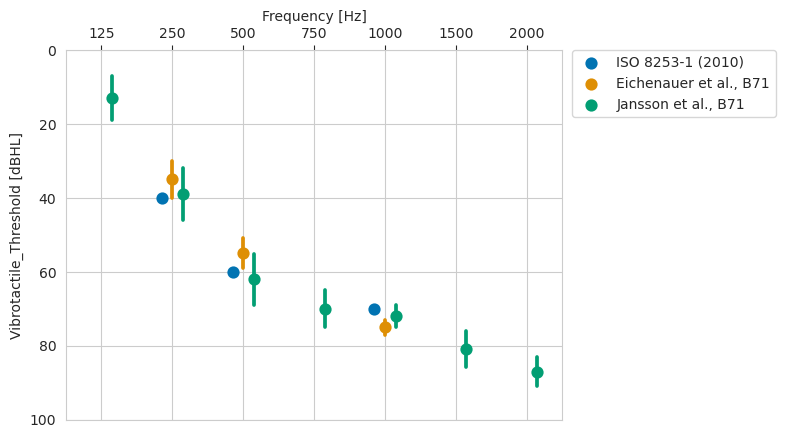

,Study,VBT_125,SD_125,VBT_250,SD_250,VBT_500,SD_500,VBT_750,SD_750,VBT_1000,SD_1000,VBT_1500,SD_1500,VBT_2000,SD_2000
0,"Eichenauer et al., B71",NaN,NaN,35.0,5.0,55.0,4.0,NaN,NaN,75.0,2.0,NaN,NaN,NaN,NaN
1,"Jansson et al., B71",13.0,6.0,39.0,7.0,62.0,7.0,70.0,5.0,72.0,3.0,81.0,5.0,87.0,4.0
2,ISO 8253-1 (2010),NaN,NaN,40.0,NaN,60.0,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN


In [13]:
# make a scatterplot of vibrotactile sensation thresholds with B71 from literature
# error bars = 1 SD
data_plot(file_in)

Data are taken from:

Eichenauer, A., Dillon, H., Clinch, B., & Loi, T. (2014). Effect of bone-conduction harmonic distortions on hearing thresholds. The Journal of the Acoustical Society of America, 136(2), EL96–EL102. https://doi.org/10.1121/1.4885771

Fredén Jansson, K. J., Håkansson, B., Reinfeldt, S., Fröhlich, L., & Rahne, T. (2017). Vibrotactile Thresholds on the Mastoid and Forehead Position of Deaf Patients Using Radioear B71 and B81. Ear and hearing, 38(6), 714–723. https://doi.org/10.1097/AUD.0000000000000456